In [1]:
import pandas as pd
import numpy as np

### Loading and cleaning data

In [ ]:
data=pd.read_csv("twitter_training.csv", header=None)
valid_data=pd.read_csv("twitter_validation.csv", names=("TweetId", "Entity", "Sentiment", "Content"))
data.columns=("TweetId", "Entity", "Sentiment", "Content")
print(data.info())
data


In [3]:
valid_data

,TweetId,Entity,Sentiment,Content
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...
...,...,...,...,...
995,4891,GrandTheftAuto(GTA),Irrelevant,⭐️ Toronto is the arts and culture capital of ...
996,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
997,2652,Borderlands,Positive,Today sucked so it’s time to drink wine n play...
998,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


In [4]:
data.isnull().sum()

TweetId        0
Entity         0
Sentiment      0
Content      686
dtype: int64

In [5]:
data.dropna(inplace=True)
data.reset_index(inplace=True, drop=True)
data

,TweetId,Entity,Sentiment,Content
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
...,...,...,...,...
73991,9200,Nvidia,Positive,Just realized that the Windows partition of my...
73992,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
73993,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
73994,9200,Nvidia,Positive,Just realized between the windows partition of...


In [6]:
data.isnull().sum()

TweetId      0
Entity       0
Sentiment    0
Content      0
dtype: int64

In [7]:
valid_data.isnull().sum()

TweetId      0
Entity       0
Sentiment    0
Content      0
dtype: int64

In [8]:
text = data['Content']
text

0        im getting on borderlands and i will murder yo...
1        I am coming to the borders and I will kill you...
2        im getting on borderlands and i will kill you ...
3        im coming on borderlands and i will murder you...
4        im getting on borderlands 2 and i will murder ...
                               ...                        
73991    Just realized that the Windows partition of my...
73992    Just realized that my Mac window partition is ...
73993    Just realized the windows partition of my Mac ...
73994    Just realized between the windows partition of...
73995    Just like the windows partition of my Mac is l...
Name: Content, Length: 73996, dtype: object

In [9]:
word_counts = [len(t.split()) for t in text.values]
word_mean = np.mean(word_counts)
letters_count = [len(t) for t in text.values]
letters_means=np.mean(letters_count)

In [10]:
print("words mean is", word_mean, "\n" "letters mean is", letters_means)

words mean is 19.226620357857183 
letters mean is 108.78365046759285


In [11]:
from collections import Counter
cnt = Counter()
for words in [t.split() for t in text.values]:
      for letters in set(words):
          cnt[letters]+=1

In [ ]:
print(cnt)

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

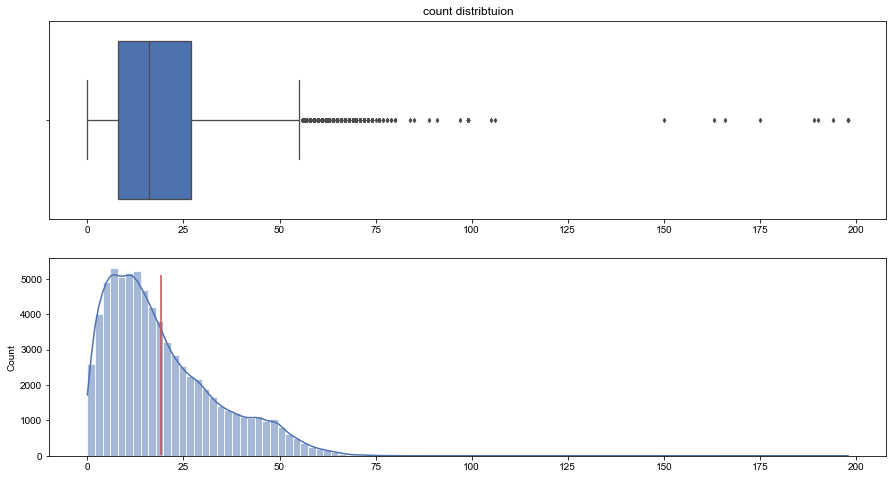

In [14]:
fig, axes = plt.subplots(2, 1,  figsize=(15, 8))
sns.set_theme(style="whitegrid")
axes[0].set_title("count distribtuion")
sns.boxplot(x=word_counts, width=0.8, saturation=5, fliersize=3, linewidth=1.3, ax=axes[0])
sns.histplot(word_counts, ax=axes[1], bins=100, kde=True)
axes[1].vlines(word_mean, 10, 5100, color = 'r')
plt.show()

In [15]:
text_outliers=text[np.array(word_counts)>81]

<AxesSubplot:xlabel='Sentiment', ylabel='count'>

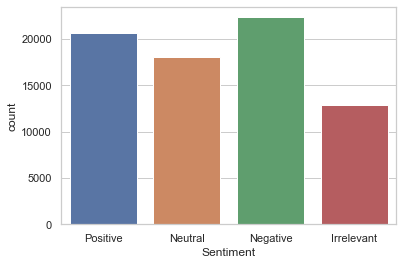

In [16]:
sns.countplot(data=data, x="Sentiment")


In [17]:
sentiment_number = []
for i in data["Sentiment"]:
    if i=="Positive":
        sentiment_number.append(1)
    elif i=="Negative":
        sentiment_number.append(-1)
    else:
        sentiment_number.append(0)
data["sentiment_number"]=sentiment_number
    
    

In [18]:
data.tail(25)

,TweetId,Entity,Sentiment,Content,sentiment_number
73971,9196,Nvidia,Negative,really doesn't look bad btw!.. net.com/google-...,-1
73972,9197,Nvidia,Neutral,Nvidia doesn’t want to give up its 2017 ‘crypt...,0
73973,9197,Nvidia,Neutral,"Nvidia plans to release its 2017 ""Crypto Craze...",0
73974,9197,Nvidia,Neutral,"Nvidia does not want to give up its ""cryptoins...",0
73975,9197,Nvidia,Neutral,Nvidia doesn’t intend to give away its 2017 ad...,0
73976,9197,Nvidia,Neutral,Nvidia therefore doesn ’ t want to give up its...,0
73977,9197,Nvidia,Neutral,is doesn’t should I give up its password ‘cryp...,0
73978,9198,Nvidia,Negative,Nvidia really delayed the 3070 2 weeks .,-1
73979,9198,Nvidia,Negative,Nvidia really delayed the 3070 by 2 weeks.,-1
73980,9198,Nvidia,Negative,Nvidia did delay by 3070 2 weeks.,-1


<AxesSubplot:xlabel='sentiment_number', ylabel='count'>

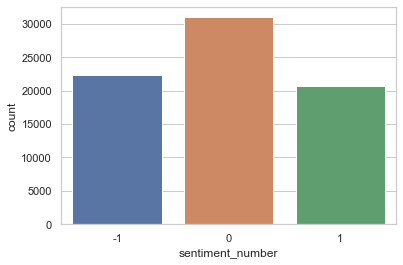

In [19]:
sns.countplot(data=data, x="sentiment_number")

In [20]:
import re
import string
import nltk
from nltk import corpus
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
ps = PorterStemmer()

In [21]:
stop_words=nltk.corpus.stopwords.words('english')

In [22]:
stop_words[0:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [23]:
def tokenize(txt):
    tokens = re.split('\W+', txt)
    return tokens

In [24]:
def remove_stopwords(text):
    txt_clean = [word for word in text if word not in stop_words]
    return txt_clean

In [25]:
def remove_punctuation(txt):
    txt_nopunct ="".join([c for c in txt if c not in string.punctuation])
    return txt_nopunct

In [26]:
data['removed_punct']=data['Content'].apply(lambda x:remove_punctuation(x))
data.head()

,TweetId,Entity,Sentiment,Content,sentiment_number,removed_punct
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...,1,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,1,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,1,im getting on borderlands and i will kill you all
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,1,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,1,im getting on borderlands 2 and i will murder ...


In [27]:
data['tokenized']=data['removed_punct'].apply(lambda x:tokenize(x.lower()))
data.head(5)

,TweetId,Entity,Sentiment,Content,sentiment_number,removed_punct,tokenized
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...,1,im getting on borderlands and i will murder yo...,"[im, getting, on, borderlands, and, i, will, m..."
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,1,I am coming to the borders and I will kill you...,"[i, am, coming, to, the, borders, and, i, will..."
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,1,im getting on borderlands and i will kill you all,"[im, getting, on, borderlands, and, i, will, k..."
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,1,im coming on borderlands and i will murder you...,"[im, coming, on, borderlands, and, i, will, mu..."
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,1,im getting on borderlands 2 and i will murder ...,"[im, getting, on, borderlands, 2, and, i, will..."


In [28]:
data['no_stop_words']=data['tokenized'].apply(lambda x:remove_stopwords(x))
data.head(10)

,TweetId,Entity,Sentiment,Content,sentiment_number,removed_punct,tokenized,no_stop_words
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...,1,im getting on borderlands and i will murder yo...,"[im, getting, on, borderlands, and, i, will, m...","[im, getting, borderlands, murder, ]"
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,1,I am coming to the borders and I will kill you...,"[i, am, coming, to, the, borders, and, i, will...","[coming, borders, kill]"
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,1,im getting on borderlands and i will kill you all,"[im, getting, on, borderlands, and, i, will, k...","[im, getting, borderlands, kill]"
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,1,im coming on borderlands and i will murder you...,"[im, coming, on, borderlands, and, i, will, mu...","[im, coming, borderlands, murder]"
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,1,im getting on borderlands 2 and i will murder ...,"[im, getting, on, borderlands, 2, and, i, will...","[im, getting, borderlands, 2, murder]"
5,2401,Borderlands,Positive,im getting into borderlands and i can murder y...,1,im getting into borderlands and i can murder y...,"[im, getting, into, borderlands, and, i, can, ...","[im, getting, borderlands, murder]"
6,2402,Borderlands,Positive,So I spent a few hours making something for fu...,1,So I spent a few hours making something for fu...,"[so, i, spent, a, few, hours, making, somethin...","[spent, hours, making, something, fun, dont, k..."
7,2402,Borderlands,Positive,So I spent a couple of hours doing something f...,1,So I spent a couple of hours doing something f...,"[so, i, spent, a, couple, of, hours, doing, so...","[spent, couple, hours, something, fun, dont, k..."
8,2402,Borderlands,Positive,So I spent a few hours doing something for fun...,1,So I spent a few hours doing something for fun...,"[so, i, spent, a, few, hours, doing, something...","[spent, hours, something, fun, dont, know, im,..."
9,2402,Borderlands,Positive,So I spent a few hours making something for fu...,1,So I spent a few hours making something for fu...,"[so, i, spent, a, few, hours, making, somethin...","[spent, hours, making, something, fun, dont, k..."


### Stemming


In [29]:
def stemming(tokenized_text):
    text=[ps.stem(word) for word in tokenized_text]
    return text

In [30]:
data['stemmed']=data['no_stop_words'].apply(lambda x: stemming(x))
data.tail(15)

,TweetId,Entity,Sentiment,Content,sentiment_number,removed_punct,tokenized,no_stop_words,stemmed
73981,9198,Nvidia,Negative,Nvidia really delayed the 3070 several weeks.,-1,Nvidia really delayed the 3070 several weeks,"[nvidia, really, delayed, the, 3070, several, ...","[nvidia, really, delayed, 3070, several, weeks]","[nvidia, realli, delay, 3070, sever, week]"
73982,9198,Nvidia,Negative,Nvidia really only delayed the 3070 2 flight w...,-1,Nvidia really only delayed the 3070 2 flight w...,"[nvidia, really, only, delayed, the, 3070, 2, ...","[nvidia, really, delayed, 3070, 2, flight, weeks]","[nvidia, realli, delay, 3070, 2, flight, week]"
73983,9198,Nvidia,Negative,Nvidia really delayed the next 2 weeks.,-1,Nvidia really delayed the next 2 weeks,"[nvidia, really, delayed, the, next, 2, weeks]","[nvidia, really, delayed, next, 2, weeks]","[nvidia, realli, delay, next, 2, week]"
73984,9199,Nvidia,Positive,Let no elim go unnoticed. . . . NVIDIA Highlig...,1,Let no elim go unnoticed NVIDIA Highlights ...,"[let, no, elim, go, unnoticed, nvidia, highlig...","[let, elim, go, unnoticed, nvidia, highlights,...","[let, elim, go, unnot, nvidia, highlight, auto..."
73985,9199,Nvidia,Positive,t let Elim go unnoticed.... NVIDIA Highlights ...,1,t let Elim go unnoticed NVIDIA Highlights auto...,"[t, let, elim, go, unnoticed, nvidia, highligh...","[let, elim, go, unnoticed, nvidia, highlights,...","[let, elim, go, unnot, nvidia, highlight, auto..."
73986,9199,Nvidia,Positive,Let no elite go unnoticed... NVIDIA Highlights...,1,Let no elite go unnoticed NVIDIA Highlights au...,"[let, no, elite, go, unnoticed, nvidia, highli...","[let, elite, go, unnoticed, nvidia, highlights...","[let, elit, go, unnot, nvidia, highlight, auto..."
73987,9199,Nvidia,Positive,Let no elim go unnoticed.... NVIDIA Highlights...,1,Let no elim go unnoticed NVIDIA Highlights aut...,"[let, no, elim, go, unnoticed, nvidia, highlig...","[let, elim, go, unnoticed, nvidia, highlights,...","[let, elim, go, unnot, nvidia, highlight, auto..."
73988,9199,Nvidia,Positive,Let a no information elim that go unnoticed......,1,Let a no information elim that go unnoticed NV...,"[let, a, no, information, elim, that, go, unno...","[let, information, elim, go, unnoticed, nvidia...","[let, inform, elim, go, unnot, nvidia, highlig..."
73989,9199,Nvidia,Positive,<unk> my elim be no.... NVIDIA Highlights Pict...,1,unk my elim be no NVIDIA Highlights Pictures r...,"[unk, my, elim, be, no, nvidia, highlights, pi...","[unk, elim, nvidia, highlights, pictures, reve...","[unk, elim, nvidia, highlight, pictur, reveal,..."
73990,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...,1,Just realized the windows partition of my Mac ...,"[just, realized, the, windows, partition, of, ...","[realized, windows, partition, mac, like, 6, y...","[realiz, window, partit, mac, like, 6, year, b..."


In [31]:
from nltk.stem import WordNetLemmatizer
wnl = WordNetLemmatizer()

### Lemmatizing

In [32]:
def Lemmatizing(lemmatized_text):
    text=[wnl.lemmatize(word) for word in lemmatized_text]
    return text

In [33]:
data['lemmed']=data['no_stop_words'].apply(lambda x: Lemmatizing(x))
data.tail(15)

,TweetId,Entity,Sentiment,Content,sentiment_number,removed_punct,tokenized,no_stop_words,stemmed,lemmed
73981,9198,Nvidia,Negative,Nvidia really delayed the 3070 several weeks.,-1,Nvidia really delayed the 3070 several weeks,"[nvidia, really, delayed, the, 3070, several, ...","[nvidia, really, delayed, 3070, several, weeks]","[nvidia, realli, delay, 3070, sever, week]","[nvidia, really, delayed, 3070, several, week]"
73982,9198,Nvidia,Negative,Nvidia really only delayed the 3070 2 flight w...,-1,Nvidia really only delayed the 3070 2 flight w...,"[nvidia, really, only, delayed, the, 3070, 2, ...","[nvidia, really, delayed, 3070, 2, flight, weeks]","[nvidia, realli, delay, 3070, 2, flight, week]","[nvidia, really, delayed, 3070, 2, flight, week]"
73983,9198,Nvidia,Negative,Nvidia really delayed the next 2 weeks.,-1,Nvidia really delayed the next 2 weeks,"[nvidia, really, delayed, the, next, 2, weeks]","[nvidia, really, delayed, next, 2, weeks]","[nvidia, realli, delay, next, 2, week]","[nvidia, really, delayed, next, 2, week]"
73984,9199,Nvidia,Positive,Let no elim go unnoticed. . . . NVIDIA Highlig...,1,Let no elim go unnoticed NVIDIA Highlights ...,"[let, no, elim, go, unnoticed, nvidia, highlig...","[let, elim, go, unnoticed, nvidia, highlights,...","[let, elim, go, unnot, nvidia, highlight, auto...","[let, elim, go, unnoticed, nvidia, highlight, ..."
73985,9199,Nvidia,Positive,t let Elim go unnoticed.... NVIDIA Highlights ...,1,t let Elim go unnoticed NVIDIA Highlights auto...,"[t, let, elim, go, unnoticed, nvidia, highligh...","[let, elim, go, unnoticed, nvidia, highlights,...","[let, elim, go, unnot, nvidia, highlight, auto...","[let, elim, go, unnoticed, nvidia, highlight, ..."
73986,9199,Nvidia,Positive,Let no elite go unnoticed... NVIDIA Highlights...,1,Let no elite go unnoticed NVIDIA Highlights au...,"[let, no, elite, go, unnoticed, nvidia, highli...","[let, elite, go, unnoticed, nvidia, highlights...","[let, elit, go, unnot, nvidia, highlight, auto...","[let, elite, go, unnoticed, nvidia, highlight,..."
73987,9199,Nvidia,Positive,Let no elim go unnoticed.... NVIDIA Highlights...,1,Let no elim go unnoticed NVIDIA Highlights aut...,"[let, no, elim, go, unnoticed, nvidia, highlig...","[let, elim, go, unnoticed, nvidia, highlights,...","[let, elim, go, unnot, nvidia, highlight, auto...","[let, elim, go, unnoticed, nvidia, highlight, ..."
73988,9199,Nvidia,Positive,Let a no information elim that go unnoticed......,1,Let a no information elim that go unnoticed NV...,"[let, a, no, information, elim, that, go, unno...","[let, information, elim, go, unnoticed, nvidia...","[let, inform, elim, go, unnot, nvidia, highlig...","[let, information, elim, go, unnoticed, nvidia..."
73989,9199,Nvidia,Positive,<unk> my elim be no.... NVIDIA Highlights Pict...,1,unk my elim be no NVIDIA Highlights Pictures r...,"[unk, my, elim, be, no, nvidia, highlights, pi...","[unk, elim, nvidia, highlights, pictures, reve...","[unk, elim, nvidia, highlight, pictur, reveal,...","[unk, elim, nvidia, highlight, picture, reveal..."
73990,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...,1,Just realized the windows partition of my Mac ...,"[just, realized, the, windows, partition, of, ...","[realized, windows, partition, mac, like, 6, y...","[realiz, window, partit, mac, like, 6, year, b...","[realized, window, partition, mac, like, 6, ye..."


In [34]:
#data.drop("removed_stoped", axis=1, inplace=True)
data.drop("tokenized", axis=1, inplace=True)
data.drop("removed_punct", axis=1, inplace=True)
data.head()

,TweetId,Entity,Sentiment,Content,sentiment_number,no_stop_words,stemmed,lemmed
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...,1,"[im, getting, borderlands, murder, ]","[im, get, borderland, murder, ]","[im, getting, borderland, murder, ]"
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,1,"[coming, borders, kill]","[come, border, kill]","[coming, border, kill]"
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,1,"[im, getting, borderlands, kill]","[im, get, borderland, kill]","[im, getting, borderland, kill]"
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,1,"[im, coming, borderlands, murder]","[im, come, borderland, murder]","[im, coming, borderland, murder]"
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,1,"[im, getting, borderlands, 2, murder]","[im, get, borderland, 2, murder]","[im, getting, borderland, 2, murder]"


In [36]:
words_count_stemmed=data.stemmed.explode().value_counts()
words_count_lemmed=data.lemmed.explode().value_counts()
print(words_count_stemmed)
print(words_count_lemmed)

                                                                                                                                                                                                           13826
game                                                                                                                                                                                                       10901
play                                                                                                                                                                                                        6962
get                                                                                                                                                                                                         5648
like                                                                                                                                                                

In [ ]:
rare_words_stemmed = words_count_stemmed[words_count_stemmed <= 2]
rare_words_lemmed = words_count_lemmed[words_count_lemmed <= 2]
print(rare_words_stemmed)
print(rare_words_lemmed)

In [38]:
def remove_rare_words_stemm(text):
    txt_clean = [word for word in text if word not in rare_words_stemmed]
    return txt_clean

In [39]:
def remove_rare_words_lemm(text):
    txt_clean = [word for word in text if word not in rare_words_lemmed]
    return txt_clean

In [40]:
data['stemmed_no_rare']=data['stemmed'].apply(lambda x: remove_rare_words_stemm(x))
data['lemmed_no_rare']=data['lemmed'].apply(lambda x: remove_rare_words_lemm(x))
data.tail(7)


,TweetId,Entity,Sentiment,Content,sentiment_number,no_stop_words,stemmed,lemmed,stemmed_no_rare,lemmed_no_rare
73989,9199,Nvidia,Positive,<unk> my elim be no.... NVIDIA Highlights Pict...,1,"[unk, elim, nvidia, highlights, pictures, reve...","[unk, elim, nvidia, highlight, pictur, reveal,...","[unk, elim, nvidia, highlight, picture, reveal...","[unk, elim, nvidia, highlight, pictur, reveal,...","[unk, elim, nvidia, highlight, picture, reveal..."
73990,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...,1,"[realized, windows, partition, mac, like, 6, y...","[realiz, window, partit, mac, like, 6, year, b...","[realized, window, partition, mac, like, 6, ye...","[realiz, window, partit, mac, like, 6, year, b...","[realized, window, partition, mac, like, 6, ye..."
73991,9200,Nvidia,Positive,Just realized that the Windows partition of my...,1,"[realized, windows, partition, mac, like, 6, y...","[realiz, window, partit, mac, like, 6, year, b...","[realized, window, partition, mac, like, 6, ye...","[realiz, window, partit, mac, like, 6, year, b...","[realized, window, partition, mac, like, 6, ye..."
73992,9200,Nvidia,Positive,Just realized that my Mac window partition is ...,1,"[realized, mac, window, partition, 6, years, b...","[realiz, mac, window, partit, 6, year, behind,...","[realized, mac, window, partition, 6, year, be...","[realiz, mac, window, partit, 6, year, behind,...","[realized, mac, window, partition, 6, year, be..."
73993,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...,1,"[realized, windows, partition, mac, 6, years, ...","[realiz, window, partit, mac, 6, year, behind,...","[realized, window, partition, mac, 6, year, be...","[realiz, window, partit, mac, 6, year, behind,...","[realized, window, partition, mac, 6, year, be..."
73994,9200,Nvidia,Positive,Just realized between the windows partition of...,1,"[realized, windows, partition, mac, like, 6, y...","[realiz, window, partit, mac, like, 6, year, b...","[realized, window, partition, mac, like, 6, ye...","[realiz, window, partit, mac, like, 6, year, b...","[realized, window, partition, mac, like, 6, ye..."
73995,9200,Nvidia,Positive,Just like the windows partition of my Mac is l...,1,"[like, windows, partition, mac, like, 6, years...","[like, window, partit, mac, like, 6, year, beh...","[like, window, partition, mac, like, 6, year, ...","[like, window, partit, mac, like, 6, year, beh...","[like, window, partition, mac, like, 6, year, ..."


In [41]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import precision_recall_fscore_support as prfs_score, confusion_matrix,classification_report,accuracy_score, f1_score, precision_score, recall_score, plot_confusion_matrix
from sklearn.model_selection import train_test_split


In [42]:
y=data['sentiment_number']
print(y)

0        1
1        1
2        1
3        1
4        1
        ..
73991    1
73992    1
73993    1
73994    1
73995    1
Name: sentiment_number, Length: 73996, dtype: int64


In [43]:
cv = CountVectorizer()

In [ ]:
data_test_stemm=data['stemmed_no_rare'].map(' '.join)
data_test_lemm=data['lemmed_no_rare'].map(' '.join)
print(data_test_stemm)
print(data_test_lemm)

In [45]:
X=cv.fit_transform(data_test_stemm).toarray()


In [46]:
print(X.shape)
print(X)


(73996, 19574)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [47]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.30,random_state= 42,stratify = y)

In [48]:
X_test.shape, y_test.shape

((22199, 19574), (22199,))

In [49]:
X_train.shape

(51797, 19574)

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB, GaussianNB 

In [51]:
nb_model = GaussianNB()
nb_model.fit(X_train,y_train)

GaussianNB()

In [52]:
nb_pred = nb_model.predict(X_test)


In [53]:
print("X Test for Naive Baies Gaussian")
print(classification_report(y_test,nb_pred))

X Test for Naive Baies Gaussian
              precision    recall  f1-score   support

          -1       0.75      0.61      0.67      6707
           0       0.97      0.59      0.73      9295
           1       0.53      0.94      0.67      6197

    accuracy                           0.69     22199
   macro avg       0.75      0.71      0.69     22199
weighted avg       0.78      0.69      0.70     22199



In [54]:
print(f1_score(y_test, nb_pred, average='micro'))
print(precision_score(y_test, nb_pred, average="macro"))
print(recall_score(y_test, nb_pred, average="macro"))


0.6935898013424028
0.7483204659781526
0.7133637729526209


c:\users\jakub\desktop\pythonprecinok\nltk\env\nltk\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


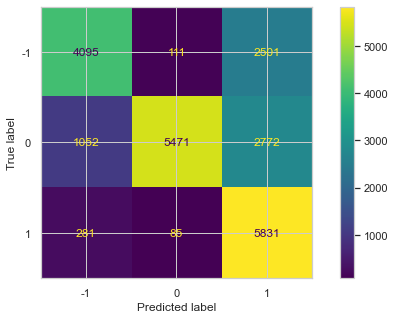

In [55]:
plt.rcParams['figure.figsize'] = 10, 5
plot_confusion_matrix(nb_model, X_test, y_test)

In [56]:
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier

### SGD Classifier

In [57]:
sgd_model = SGDClassifier()
sgd_model.fit(X_train,y_train)

SGDClassifier()

In [58]:
sgd_pred = sgd_model.predict(X_test)

In [59]:
print("X Test for SGD - lemma")
print(classification_report(y_test,sgd_pred))

X Test for SGD - lemma
              precision    recall  f1-score   support

          -1       0.81      0.80      0.81      6707
           0       0.79      0.82      0.81      9295
           1       0.78      0.76      0.77      6197

    accuracy                           0.80     22199
   macro avg       0.80      0.79      0.80     22199
weighted avg       0.80      0.80      0.80     22199



In [60]:
print(f1_score(y_test, sgd_pred, average='micro'))
print(precision_score(y_test, sgd_pred, average="macro"))
print(recall_score(y_test, sgd_pred, average="macro"))

0.7975584485787649
0.7975999002496712
0.7935936485020413


### Linear SVC Classifier

In [61]:
svm_model = LinearSVC(max_iter=4000)
svm_model.fit(X_train,y_train)

c:\users\jakub\desktop\pythonprecinok\nltk\env\nltk\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(max_iter=4000)

In [62]:
svm_pred = svm_model.predict(X_test)

In [63]:
print("X Test for SVM - stemm")
print(classification_report(y_test,svm_pred))

X Test for SVM - stemm
              precision    recall  f1-score   support

          -1       0.85      0.84      0.84      6707
           0       0.84      0.85      0.85      9295
           1       0.82      0.81      0.82      6197

    accuracy                           0.84     22199
   macro avg       0.84      0.84      0.84     22199
weighted avg       0.84      0.84      0.84     22199



In [64]:
print(f1_score(y_test, svm_pred, average='micro'))
print(precision_score(y_test, svm_pred, average="macro"))
print(recall_score(y_test, svm_pred, average="macro"))

0.8383710977971981
0.8378323874805629
0.835639766640872
